In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
df = pd.read_csv("AB_NYC_2019.csv")

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Cleaning up dataset

Filling in the null entries and dropping columns that are unecessary

In [11]:
df.drop(["id", "latitude", "longitude", "last_review", "calculated_host_listings_count", "reviews_per_month", "minimum_nights", "availability_365"], axis=1, inplace=True)
df["name"].fillna("missing", inplace=True)

# Dataset information

There are 5 neighbourhood groups in the dataset.

There are 3 room types in the dataset.

In [18]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)


# Visualisation

A bar chart to show the number of listings per neighbourhood group.

Manhattan has the most number of listings followed by Brooklyn.

Staten Island in comparison has very few listings.

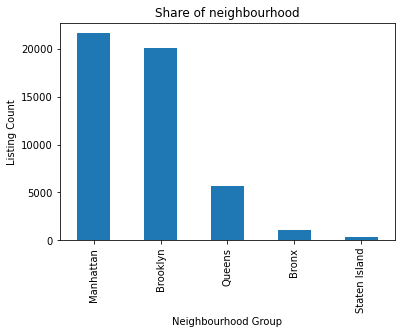

In [16]:
df.neighbourhood_group.value_counts().plot(kind="bar")
plt.title("Share of neighbourhood")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Listing Count");

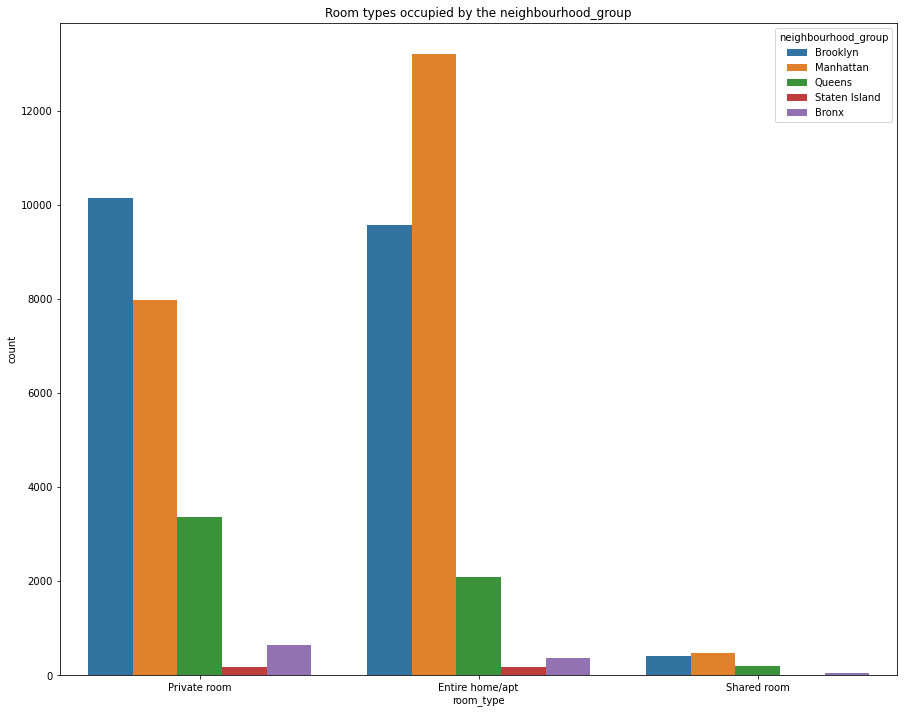

In [21]:
plt.figure(figsize=(15,12))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df)
plt.title("Room types occupied by the neighbourhood_group");

# Quick Sort

Finding out the maximum and minimum number of reviews of the entire dataset, and sorting from minimum to maximum.

Quick Sort is a sorting algorithm that uses the divide-and-conquer method. First a Pivot is selected. This is an element in the list to base the sorting on, usually the last element in the list. Secondly, the elements are divided into 3 sequences. 1: Elements < pivot 2: Elements = pivot 3: Elements > pivot Thirdly, sequence 1 and 3 are recursively sorted. Fourthly, the sorted sequences are combined together, from 1-3 in order.

The following Quick Sort algorithm is done in place, which uses less memory as it does not have to create additional sequences. It works by moving the elements on the left forward, and the elements on the right backwards, by swapping those smaller than the pivot with those larger than the pivot respectively.

The best case occurs when the selected pivot value is close to the middle of the sequence, and thus having evenly split sequences. The best case running time is then O(n log n). On average, the expected running time is also O(n log n). It is the fastest sorting algorithm for large datasets, like the one that is used here. The worst case occurs when the pivot is either the minimum or maximum element in the list and the running time is O(n2)

In [23]:
def quick_sort(array, start, end): 
    if start >= end: 
        return 
    pivot = array[end]
    left = start 
    right = end - 1
    while left <= right: 
        while left <= right and array[left] < pivot: 
            left += 1
        while left <= right and pivot < array[right]: 
            right -=1 
        if left <= right:
            array[left], array[right] = array[right], array[left]
            left, right = left + 1, right - 1
    array[left], array[end] = array[end], array[left]
    quick_sort(array, start, left - 1)
    quick_sort(array, left + 1, end)

In [24]:
reviews = df["number_of_reviews"].unique()

In [26]:
reviewslist = []
for i in reviews: 
    reviewslist.append(i)
    
quick_sort(reviewslist, 0, len(reviewslist)-1)
print(reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# Sort by neighbourhood group and room type 

Private Room

In [31]:
bpr = df[(df["neighbourhood_group"] == 'Brooklyn') & (df["room_type"] == 'Private room')]
bpr_reviews = bpr['number_of_reviews'].unique()

mpr = df[(df["neighbourhood_group"] == 'Manhattan') & (df["room_type"] == 'Private room')]
mpr_reviews = mpr['number_of_reviews'].unique()

qpr = df[(df["neighbourhood_group"] == 'Queens') & (df["room_type"] == 'Private room')]
qpr_reviews = qpr['number_of_reviews'].unique()

spr = df[(df["neighbourhood_group"] == 'Staten Island') & (df["room_type"] == 'Private room')]
spr_reviews = spr['number_of_reviews'].unique()

b2pr = df[(df["neighbourhood_group"] == 'Bronx') & (df["room_type"] == 'Private room')]
b2pr_reviews = spr['number_of_reviews'].unique()

Brooklyn

In [32]:
bpr_reviewslist = []
for i in bpr_reviews: 
    bpr_reviewslist.append(i)

quick_sort(bpr_reviewslist, 0, len(bpr_reviewslist) - 1)
print(bpr_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 186, 188, 189, 190, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 232,

Manhattan

In [33]:
mpr_reviewslist = []
for i in mpr_reviews: 
    mpr_reviewslist.append(i)

quick_sort(mpr_reviewslist, 0, len(mpr_reviewslist) - 1)
print(mpr_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 218, 219, 220, 221, 222, 223, 225, 226,

Queens

In [34]:
qpr_reviewslist = []
for i in qpr_reviews: 
    qpr_reviewslist.append(i)

quick_sort(qpr_reviewslist, 0, len(qpr_reviewslist) - 1)
print(qpr_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 148, 150, 151, 153, 154, 156, 158, 160, 161, 162, 164, 165, 166, 168, 170, 173, 175, 177, 178, 179, 183, 184, 185, 186, 187, 188, 189, 190, 191, 201, 204, 207, 208, 209, 210, 211, 212, 214, 218, 219, 220, 222, 224, 231, 235, 239, 240, 243, 244, 248, 251, 254, 255, 257, 258, 262, 270, 274, 275, 281, 296, 302, 304, 305, 306, 325, 333, 336, 341, 347, 356, 368, 375, 386, 392, 403, 408, 411, 412, 417

Staten Island

In [35]:
spr_reviewslist = []
for i in spr_reviews: 
    spr_reviewslist.append(i)

quick_sort(spr_reviewslist, 0, len(spr_reviewslist) - 1)
print(spr_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 29, 30, 32, 34, 36, 37, 38, 39, 40, 42, 45, 47, 48, 50, 51, 53, 56, 59, 60, 61, 63, 64, 65, 73, 74, 77, 80, 82, 86, 88, 90, 93, 100, 112, 137, 145, 147, 149, 151, 157, 166, 177, 193, 234, 333]


Bronx

In [36]:
b2pr_reviewslist = []
for i in b2pr_reviews: 
    b2pr_reviewslist.append(i)

quick_sort(b2pr_reviewslist, 0, len(b2pr_reviewslist) - 1)
print(b2pr_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 29, 30, 32, 34, 36, 37, 38, 39, 40, 42, 45, 47, 48, 50, 51, 53, 56, 59, 60, 61, 63, 64, 65, 73, 74, 77, 80, 82, 86, 88, 90, 93, 100, 112, 137, 145, 147, 149, 151, 157, 166, 177, 193, 234, 333]


Entire home/apartment

In [37]:
beh = df[(df["neighbourhood_group"] == 'Brooklyn') & (df["room_type"] == 'Entire home/apt')]
beh_reviews = beh["number_of_reviews"].unique()

meh = df[(df["neighbourhood_group"] == 'Manhattan') & (df["room_type"] == 'Entire home/apt')]
meh_reviews = meh['number_of_reviews'].unique()

qeh = df[(df["neighbourhood_group"] == 'Queens') & (df["room_type"] == 'Entire home/apt')]
qeh_reviews = qeh['number_of_reviews'].unique()

seh = df[(df["neighbourhood_group"] == 'Staten Island') & (df["room_type"] == 'Entire home/apt')]
seh_reviews = seh['number_of_reviews'].unique()

b2eh = df[(df["neighbourhood_group"] == 'Bronx') & (df["room_type"] == 'Entire home/apt')]
b2eh_reviews = b2eh['number_of_reviews'].unique()

Brooklyn

In [38]:
beh_reviewslist = []
for i in beh_reviews: 
    beh_reviewslist.append(i)

quick_sort(beh_reviewslist, 0, len(beh_reviewslist) - 1)
print(beh_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224,

Manhattan

In [39]:
meh_reviewslist = []
for i in meh_reviews: 
    meh_reviewslist.append(i)

quick_sort(meh_reviewslist, 0, len(meh_reviewslist) - 1)
print(meh_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 190, 191, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 216, 219, 220, 221, 222, 225, 226, 227, 229, 230, 232, 233,

Queens

In [40]:
qeh_reviewslist = []
for i in qeh_reviews: 
    qeh_reviewslist.append(i)

quick_sort(qeh_reviewslist, 0, len(qeh_reviewslist) - 1)
print(qeh_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 166, 169, 171, 172, 175, 176, 177, 182, 184, 185, 186, 188, 192, 196, 197, 198, 202, 204, 206, 209, 212, 214, 216, 217, 227, 229, 237, 239, 240, 252, 256, 257, 259, 260, 262, 268, 272, 279, 289, 310, 313, 352, 414, 434, 441]


Staten Island

In [41]:
seh_reviewslist = []
for i in seh_reviews: 
    seh_reviewslist.append(i)

quick_sort(seh_reviewslist, 0, len(seh_reviewslist) - 1)
print(seh_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 35, 36, 37, 39, 43, 45, 47, 49, 51, 52, 54, 59, 61, 62, 63, 68, 69, 70, 76, 79, 81, 82, 83, 87, 96, 97, 103, 105, 108, 110, 116, 117, 118, 129, 131, 132, 136, 139, 147, 177, 196, 242]


Bronx

In [42]:
b2eh_reviewslist = []
for i in b2eh_reviews: 
    b2eh_reviewslist.append(i)

quick_sort(b2eh_reviewslist, 0, len(b2eh_reviewslist) - 1)
print(b2eh_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 54, 57, 58, 59, 61, 62, 66, 67, 68, 69, 70, 71, 73, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 92, 94, 95, 98, 100, 103, 104, 105, 106, 107, 112, 114, 116, 118, 119, 121, 132, 142, 147, 152, 170, 185, 189, 192, 197, 199, 205, 206, 227, 266, 271]


Shared Room

In [43]:
bsr = df[(df["neighbourhood_group"] == 'Brooklyn') & (df["room_type"] == 'Shared room')]
bsr_reviews = bsr["number_of_reviews"].unique()

msr = df[(df["neighbourhood_group"] == 'Manhattan') & (df["room_type"] == 'Shared room')]
msr_reviews = msr['number_of_reviews'].unique()

qsr = df[(df["neighbourhood_group"] == 'Queens') & (df["room_type"] == 'Shared room')]
qsr_reviews = qsr['number_of_reviews'].unique()

ssr = df[(df["neighbourhood_group"] == 'Staten Island') & (df["room_type"] == 'Shared room')]
ssr_reviews = ssr['number_of_reviews'].unique()

b2sr = df[(df["neighbourhood_group"] == 'Bronx') & (df["room_type"] == 'Shared room')]
b2sr_reviews = b2sr['number_of_reviews'].unique()

Brooklyn

In [45]:
bsr_reviewslist = []
for i in bsr_reviews: 
    bsr_reviewslist.append(i)

quick_sort(bsr_reviewslist, 0, len(bsr_reviewslist) - 1)
print(bsr_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 37, 41, 44, 45, 46, 47, 48, 55, 57, 59, 64, 69, 73, 76, 80, 81, 83, 91, 99, 102, 103, 104, 105, 110, 114, 116, 117, 119, 120, 124, 126, 135, 146, 155, 197, 236]


Manhattan

In [46]:
msr_reviewslist = []
for i in msr_reviews: 
    msr_reviewslist.append(i)

quick_sort(msr_reviewslist, 0, len(msr_reviewslist) - 1)
print(msr_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 73, 76, 81, 84, 88, 90, 93, 94, 101, 103, 104, 105, 107, 108, 112, 115, 117, 118, 125, 126, 131, 134, 136, 158, 168, 181, 205, 214, 225, 228, 229]


Queens

In [47]:
qsr_reviewslist = []
for i in qsr_reviews: 
    qsr_reviewslist.append(i)

quick_sort(qsr_reviewslist, 0, len(qsr_reviewslist) - 1)
print(qsr_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 30, 34, 36, 38, 39, 41, 45, 51, 54, 56, 63, 65, 68, 120, 127, 224, 454]


Staten Island

In [48]:
ssr_reviewslist = []
for i in ssr_reviews: 
    ssr_reviewslist.append(i)

quick_sort(ssr_reviewslist, 0, len(ssr_reviewslist) - 1)
print(ssr_reviewslist)

[0, 1, 2, 9]


Bronx

In [49]:
b2sr_reviewslist = []
for i in b2sr_reviews: 
    b2sr_reviewslist.append(i)

quick_sort(b2sr_reviewslist, 0, len(b2sr_reviewslist) - 1)
print(b2sr_reviewslist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 17, 18, 20, 26, 29, 116]


# Binary Search Tree

To find out maximum and minimum price, and sort the price list, we use a Binary Search Tree.

A Binary Search Tree is a data structure where each node has at most two children, and the the value of the left-child is less than the value of its parent, and the value of the right-child is greater than the value of its parent.

Inorder traversal of the Binary Search Tree visits positions in increasing order of the keys. Using the Inorder method, we can sort the price list in ascending order, from minimum to maximum price.

The Search method runs through the tree and finds the particular value the user wants to look for. It returns True if the value is found, and False if the value is not found. If the particular value is less than the root value, the algorithm will search for it in the left subtree. If the particular value is greater than the root value, the algorithm will search for it in the right subtree. The algorithm will continue searching for the value by comparing it to the parent value then moving to the left or right child accordingly.

Searching and insertion depend on the height of the tree, as it starts at the root node and makes its way down the tree, therefore it takes a time of O(h). On average, a Binary Search Tree is expected to have height O(log n) so the running time is O(log n). The best case running time is also O(log n) when the tree is balanced and full. The worst case running time is O(n) when the tree is skewed.

In [50]:
class BinarySearchTree: 
    def __init__(self, key = None): 
        self.key = key 
        self.left = None 
        self.right = None 
    
    def add(self, key): 
        if not self.key: 
            self.key = key 
            return 
        
        if self.key == key: 
            return 
        
        if key < self.key: 
            if self.left: 
                self.left.add(key)
                return 
            self.left = BinarySearchTree(key)
            return 
        
        if self.right: 
            self.right.add(key)
            return 
        self.right = BinarySearchTree(key)
    
    def get_min(self):
        current = self
        while current.left is not None: 
            current = current.left 
        return current.key 
    
    def get_max(self): 
        current = self 
        while current.right is not None: 
            current = current.right 
        return current.key 
    
    def inorder(self, keys): 
        if self.left is not None: 
            self.left.inorder(keys)
        if self.key is not None: 
            keys.append(self.key)
        if self.right is not None: 
            self.right.inorder(keys)
        return keys
    
    def search(self, key): 
        if key == self.key: 
            return True
        if key < self.key:
            if self.left == None: 
                return False
            return self.left.search(key)
        if key > self.key: 
            if self.right == None: 
                return False
            return self.right.search(key)

In [59]:
price = df['price'].unique()

pricelist = BinarySearchTree() 

for i in range(len(price)): 
    pricelist.add(price[i])
    
print(pricelist.inorder([]))
print(" ")
print("The minimum price is: $", pricelist.get_min())
print("The maximum price is: $", pricelist.get_max())

[0, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,

Private Rom

In [53]:
bpr_price = bpr['price'].unique()
mpr_price = mpr['price'].unique()
qpr_price = qpr['price'].unique()
spr_price = spr['price'].unique()
b2pr_price = b2pr['price'].unique()

Brooklyn

In [60]:
bpr_pricelist = BinarySearchTree() 

for i in range(len(bpr_price)): 
    bpr_pricelist.add(bpr_price[i])
    
print(bpr_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", bpr_pricelist.get_min())
print("The maximum price is: $", bpr_pricelist.get_max())

[0, 10, 15, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 135, 137, 138, 139, 140, 142, 145, 146, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 165, 166, 168, 169, 170, 175, 178, 179, 180, 184, 185, 187, 188, 189, 190, 195, 196, 199, 200, 206, 209, 210, 212, 215, 220, 225, 230, 239, 240, 241, 245, 249, 250, 259, 274, 275, 279, 280, 290, 295, 299, 300, 319, 340, 349, 350, 365, 375, 380, 399, 400, 425, 430, 438, 450, 475, 477, 500, 525, 550, 599, 600, 640, 700, 750, 800, 900, 935, 974, 1000, 1002, 1100, 1300, 1333, 1350, 1500, 1600, 1750, 2000,

Manhattan

In [112]:
mpr_pricelist = BinarySearchTree() 

for i in range(len(mpr_price)): 
    mpr_pricelist.add(mpr_price[i])
    
print(mpr_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", mpr_pricelist.get_min())
print("The maximum price is: $", mpr_pricelist.get_max())

[10, 12, 16, 20, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 163, 164, 165, 166, 167, 169, 170, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 202, 204, 205, 207, 208, 209, 210, 215, 217, 219, 220, 222, 224, 225, 227, 228, 229, 230, 231, 233, 235, 240, 244, 245, 246, 249, 250, 252, 255, 256, 258, 260, 262, 264, 269, 270, 274, 275, 279, 280, 285, 289, 290, 293, 

Queens

In [62]:
qpr_pricelist = BinarySearchTree() 

for i in range(len(qpr_price)): 
    qpr_pricelist.add(qpr_price[i])
    
print(qpr_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", qpr_pricelist.get_min())
print("The maximum price is: $", qpr_pricelist.get_max())

[10, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 108, 109, 110, 112, 113, 115, 116, 119, 120, 125, 129, 130, 132, 133, 135, 138, 139, 140, 145, 147, 149, 150, 155, 159, 160, 165, 166, 169, 170, 175, 178, 180, 185, 190, 195, 199, 200, 208, 220, 225, 239, 250, 259, 289, 300, 340, 349, 350, 375, 389, 395, 399, 400, 425, 443, 475, 500, 600, 700, 750, 875, 900, 2000, 10000]
 
The minimum price is: $ 10
The maximum price is: $ 10000


Staten Island

In [63]:
spr_pricelist = BinarySearchTree() 

for i in range(len(spr_price)): 
    spr_pricelist.add(spr_price[i])
    
print(spr_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", spr_pricelist.get_min())
print("The maximum price is: $", spr_pricelist.get_max())

[20, 22, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 63, 65, 68, 69, 70, 71, 72, 75, 79, 80, 83, 85, 89, 90, 95, 99, 100, 105, 110, 115, 118, 120, 129, 135, 150, 200, 235, 300]
 
The minimum price is: $ 20
The maximum price is: $ 300


Bronx

In [65]:
b2pr_pricelist = BinarySearchTree() 

for i in range(len(b2pr_price)): 
    b2pr_pricelist.add(b2pr_price[i])
    
print(b2pr_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", b2pr_pricelist.get_min())
print("The maximum price is: $", b2pr_pricelist.get_max())

[10, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 74, 75, 77, 79, 80, 82, 85, 87, 90, 95, 99, 100, 105, 107, 119, 120, 122, 125, 130, 140, 142, 145, 149, 150, 160, 187, 200, 240, 300, 500, 600, 680, 2500]
 
The minimum price is: $ 10
The maximum price is: $ 2500


Entire home/apartment

In [66]:
beh_price = beh['price'].unique()
meh_price = meh['price'].unique()
qeh_price = qeh['price'].unique()
seh_price = seh['price'].unique()
b2eh_price = b2eh['price'].unique()

Brooklyn

In [67]:
beh_pricelist = BinarySearchTree() 

for i in range(len(beh_price)): 
    beh_pricelist.add(beh_price[i])
    
print(beh_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", beh_pricelist.get_min())
print("The maximum price is: $", beh_pricelist.get_max())

[10, 11, 12, 20, 22, 25, 28, 30, 32, 33, 34, 35, 37, 38, 40, 41, 43, 44, 45, 46, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 239, 240, 241, 243, 244, 245, 246, 247, 248, 249, 250,

Manhattan

In [68]:
meh_pricelist = BinarySearchTree() 

for i in range(len(meh_price)): 
    meh_pricelist.add(meh_price[i])
    
print(meh_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", meh_pricelist.get_min())
print("The maximum price is: $", meh_pricelist.get_max())

[0, 10, 11, 12, 15, 16, 35, 37, 40, 45, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 25

Queens

In [69]:
qeh_pricelist = BinarySearchTree() 

for i in range(len(qeh_price)): 
    qeh_pricelist.add(qeh_price[i])
    
print(qeh_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", qeh_pricelist.get_min())
print("The maximum price is: $", qeh_pricelist.get_max())

[10, 15, 16, 20, 25, 30, 35, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 155, 156, 158, 159, 160, 165, 166, 167, 168, 169, 170, 174, 175, 178, 179, 180, 183, 184, 185, 187, 188, 189, 190, 192, 195, 196, 197, 198, 199, 200, 204, 205, 207, 210, 215, 219, 220, 225, 228, 229, 230, 231, 235, 238, 239, 240, 245, 246, 248, 249, 250, 254, 255, 257, 258, 259, 260, 261, 265, 268, 274, 275, 278, 280, 283, 285, 288, 289, 290, 295, 298, 299, 300, 320, 325, 340, 349, 350, 359, 360, 369, 375, 379, 390, 395, 396, 398, 399, 400, 425, 450, 455, 460, 485, 499, 500, 509, 545

Staten Island

In [70]:
seh_pricelist = BinarySearchTree()

for i in range(len(seh_price)): 
    seh_pricelist.add(seh_price[i])
    
print(seh_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", seh_pricelist.get_min())
print("The maximum price is: $", seh_pricelist.get_max())

[48, 49, 50, 51, 55, 57, 58, 60, 61, 62, 65, 67, 68, 70, 71, 72, 75, 77, 78, 80, 83, 85, 86, 89, 90, 91, 95, 97, 99, 100, 103, 105, 106, 109, 110, 115, 119, 120, 122, 125, 130, 135, 138, 140, 144, 149, 150, 155, 161, 165, 175, 180, 185, 190, 195, 199, 200, 221, 245, 249, 250, 275, 289, 299, 300, 429, 450, 625, 700, 800, 1000, 1250, 5000]
 
The minimum price is: $ 48
The maximum price is: $ 5000


Bronx

In [71]:
b2eh_pricelist = BinarySearchTree() 

for i in range(len(b2eh_price)): 
    b2eh_pricelist.add(b2eh_price[i])
    
print(b2eh_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", b2eh_pricelist.get_min())
print("The maximum price is: $", b2eh_pricelist.get_max())

[28, 35, 37, 39, 40, 42, 47, 48, 49, 50, 55, 57, 58, 59, 60, 62, 63, 65, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 79, 80, 81, 84, 85, 86, 87, 88, 89, 90, 92, 93, 95, 98, 99, 100, 101, 102, 103, 104, 105, 107, 109, 110, 114, 115, 117, 119, 120, 125, 127, 128, 130, 132, 135, 139, 140, 142, 145, 148, 149, 150, 155, 159, 165, 168, 175, 178, 189, 190, 195, 196, 199, 200, 220, 223, 225, 240, 247, 250, 280, 288, 289, 299, 300, 309, 325, 350, 360, 379, 390, 399, 425, 450, 475, 500, 600, 670, 1000]
 
The minimum price is: $ 28
The maximum price is: $ 1000


Shared Room

In [72]:
bsr_price = bsr['price'].unique()
msr_price = msr['price'].unique()
qsr_price = qsr['price'].unique()
ssr_price = ssr['price'].unique()
b2sr_price = b2sr['price'].unique()

Brooklyn

In [73]:
bsr_pricelist = BinarySearchTree() 

for i in range(len(bsr_price)): 
    bsr_pricelist.add(bsr_price[i])
    
print(bsr_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", bsr_pricelist.get_min())
print("The maximum price is: $", bsr_pricelist.get_max())

[15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 59, 60, 62, 64, 65, 68, 70, 72, 75, 78, 79, 80, 85, 90, 95, 99, 100, 110, 115, 119, 125, 130, 149, 150, 159, 175, 179, 185, 195, 200, 225, 250, 300, 400, 725]
 
The minimum price is: $ 15
The maximum price is: $ 725


Manhattan

In [74]:
msr_pricelist = BinarySearchTree() 

for i in range(len(msr_price)): 
    msr_pricelist.add(msr_price[i])
    
print(msr_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", msr_pricelist.get_min())
print("The maximum price is: $", msr_pricelist.get_max())

[10, 20, 25, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 53, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 75, 76, 77, 78, 79, 80, 85, 89, 90, 95, 96, 97, 99, 100, 103, 105, 110, 115, 116, 117, 120, 125, 130, 139, 145, 147, 150, 160, 165, 169, 175, 180, 185, 195, 199, 200, 209, 220, 235, 249, 250, 260, 299, 300, 320, 337, 350, 360, 400, 450, 500, 800, 1000]
 
The minimum price is: $ 10
The maximum price is: $ 1000


Queens

In [75]:
qsr_pricelist = BinarySearchTree() 

for i in range(len(qsr_price)): 
    qsr_pricelist.add(qsr_price[i])
    
print(qsr_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", qsr_pricelist.get_min())
print("The maximum price is: $", qsr_pricelist.get_max())

[11, 12, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 48, 49, 50, 51, 52, 55, 58, 60, 65, 69, 70, 72, 73, 75, 79, 99, 100, 105, 108, 110, 120, 150, 200, 300, 500, 1000, 1250, 1800]
 
The minimum price is: $ 11
The maximum price is: $ 1800


Staten Island

In [76]:
ssr_pricelist = BinarySearchTree() 

for i in range(len(ssr_price)): 
    ssr_pricelist.add(ssr_price[i])
    
print(ssr_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", ssr_pricelist.get_min())
print("The maximum price is: $", ssr_pricelist.get_max())

[13, 20, 29, 30, 75, 95, 150]
 
The minimum price is: $ 13
The maximum price is: $ 150


Bronx

In [77]:
b2sr_pricelist = BinarySearchTree() 

for i in range(len(b2sr_price)): 
    b2sr_pricelist.add(b2sr_price[i])
    
print(b2sr_pricelist.inorder([]))
print(" ")
print("The minimum price is: $", b2sr_pricelist.get_min())
print("The maximum price is: $", b2sr_pricelist.get_max())

[20, 22, 25, 26, 28, 32, 33, 35, 36, 40, 45, 49, 50, 51, 55, 57, 60, 65, 70, 77, 80, 85, 110, 130, 150, 165, 800]
 
The minimum price is: $ 20
The maximum price is: $ 800


# Hash Table

To store host id and name of listing as key-value pairs for further data exploration.

A Hash Table is a data structure that stores key-value pairs in buckets. A hash function works as an index to map each key to a bucket.

The find method looks for the specific key the user wants, and returns the value associated with it.

A Hash Table is very efficient and quick, with a best case running time of O(1) for insertion and searching. The worst case running time is then O(n).

In [78]:
class HashTable: 
    def __init__(self, size): 
        self.table = [None] * size
    
    def hash(self, key): 
        size = len(self.table)
        return hash(key) % size
    
    def insert(self, key, value): 
        index = self.hash(key)
        if self.table[index] is not None: 
            for kvp in self.table[index]: 
                if kvp[0] == key: 
                    kvp[1] = value
                    break 
            else: 
                self.table[index].append([key, value])
        else: 
            self.table[index] = []
            self.table[index].append([key, value])
        
        if self.is_full(): 
            self.double()
    
    def find(self, key): 
        index = self.hash(key)
        if self.table[index] is None: 
            return "No value found"
        else: 
            for kvp in self.table[index]: 
                if kvp[0] == key: 
                    return kvp[1]
    
    def is_full(self): 
        items = 0 
        for item in self.table: 
            if item is not None: 
                items += 1
        return items > len(self.table)/2
    
    def double(self): 
        hash_2 = HashTable(size = len(self.table) * 2)
        for i in range(len(self.table)): 
            if self.table[i] is None: 
                continue
            for kvp in self.table[i]: 
                hash_2.insert(kvp[0], kvp[1])
        self.table = hash_2.table

Private Room

In [79]:
bpr_id = bpr['host_id']
bpr_name = bpr['name']

mpr_id = mpr['host_id']
mpr_name = mpr['name']

qpr_id = qpr['host_id']
qpr_name = qpr['name']

spr_id = spr['host_id']
spr_name = spr['name']

b2pr_id = b2pr['host_id']
b2pr_name = b2pr['name']

Brooklyn

In [82]:
bpr_idlist = [] 
for i in bpr_id: 
    bpr_idlist.append(i)

bpr_namelist = []
for i in bpr_name: 
    bpr_namelist.append(i)

bpr_hash = HashTable(len(bpr_idlist))
for i in range(len(bpr_idlist)): 
    bpr_hash.insert(bpr_idlist[i], bpr_namelist[i])

Manhattan

In [81]:
mpr_idlist = [] 
for i in mpr_id: 
    mpr_idlist.append(i)

mpr_namelist = []
for i in mpr_name: 
    mpr_namelist.append(i)

mpr_hash = HashTable(len(mpr_idlist))
for i in range(len(mpr_idlist)): 
    mpr_hash.insert(mpr_idlist[i], mpr_namelist[i])

Queens

In [83]:
qpr_idlist = [] 
for i in qpr_id: 
    qpr_idlist.append(i)

qpr_namelist = []
for i in qpr_name: 
    qpr_namelist.append(i)

qpr_hash = HashTable(len(qpr_idlist))
for i in range(len(qpr_idlist)): 
    qpr_hash.insert(qpr_idlist[i], qpr_namelist[i])

Staten Island

In [84]:
spr_idlist = [] 
for i in spr_id: 
    spr_idlist.append(i)

spr_namelist = []
for i in spr_name: 
    spr_namelist.append(i)

spr_hash = HashTable(len(spr_idlist))
for i in range(len(spr_idlist)): 
    spr_hash.insert(spr_idlist[i], spr_namelist[i])

Bronx

In [85]:
b2pr_idlist = [] 
for i in b2pr_id: 
    b2pr_idlist.append(i)

b2pr_namelist = []
for i in b2pr_name: 
    b2pr_namelist.append(i)

b2pr_hash = HashTable(len(b2pr_idlist))
for i in range(len(b2pr_idlist)): 
    b2pr_hash.insert(b2pr_idlist[i], b2pr_namelist[i])

Entire home/apartment

In [86]:
beh_id = beh['host_id']
beh_name = beh['name']

meh_id = meh['host_id']
meh_name = meh['name']

qeh_id = qeh['host_id']
qeh_name = qeh['name']

seh_id = seh['host_id']
seh_name = seh['name']

b2eh_id = b2eh['host_id']
b2eh_name = b2eh['name']

Brooklyn

In [87]:
beh_idlist = [] 
for i in beh_id: 
    beh_idlist.append(i)

beh_namelist = []
for i in beh_name: 
    beh_namelist.append(i)

beh_hash = HashTable(len(beh_idlist))
for i in range(len(beh_idlist)): 
    beh_hash.insert(beh_idlist[i], beh_namelist[i])

Manhattan

In [88]:
meh_idlist = [] 
for i in meh_id: 
    meh_idlist.append(i)

meh_namelist = []
for i in meh_name: 
    meh_namelist.append(i)

meh_hash = HashTable(len(meh_idlist))
for i in range(len(meh_idlist)): 
    meh_hash.insert(meh_idlist[i], meh_namelist[i])

Queens

In [89]:
qeh_idlist = [] 
for i in qeh_id: 
    qeh_idlist.append(i)

qeh_namelist = []
for i in qeh_name: 
    qeh_namelist.append(i)

qeh_hash = HashTable(len(qeh_idlist))
for i in range(len(qeh_idlist)): 
    qeh_hash.insert(qeh_idlist[i], qeh_namelist[i])

Staten Island

In [92]:
seh_idlist = [] 
for i in seh_id: 
    seh_idlist.append(i)

seh_namelist = []
for i in seh_name: 
    seh_namelist.append(i)

seh_hash = HashTable(len(seh_idlist))
for i in range(len(seh_idlist)): 
    seh_hash.insert(seh_idlist[i], seh_namelist[i])

Bronx

In [93]:
b2eh_idlist = [] 
for i in b2eh_id: 
    b2eh_idlist.append(i)

b2eh_namelist = []
for i in b2eh_name: 
    b2eh_namelist.append(i)

b2eh_hash = HashTable(len(b2eh_idlist))
for i in range(len(b2eh_idlist)): 
    b2eh_hash.insert(b2eh_idlist[i], b2eh_namelist[i])

Shared Room

In [94]:
bsr_id = bsr['host_id']
bsr_name = bsr['name']

msr_id = msr['host_id']
msr_name = msr['name']

qsr_id = qsr['host_id']
qsr_name = qsr['name']

ssr_id = ssr['host_id']
ssr_name = ssr['name']

b2sr_id = b2sr['host_id']
b2sr_name = b2sr['name']

Brooklyn

In [95]:
bsr_idlist = [] 
for i in bsr_id: 
    bsr_idlist.append(i)

bsr_namelist = []
for i in bsr_name: 
    bsr_namelist.append(i)

bsr_hash = HashTable(len(bsr_idlist))
for i in range(len(bsr_idlist)): 
    bsr_hash.insert(bsr_idlist[i], bsr_namelist[i])

Manhattan

In [96]:
msr_idlist = [] 
for i in msr_id: 
    msr_idlist.append(i)

msr_namelist = []
for i in msr_name: 
    msr_namelist.append(i)

msr_hash = HashTable(len(msr_idlist))
for i in range(len(msr_idlist)): 
    msr_hash.insert(msr_idlist[i], msr_namelist[i])

Queens

In [98]:
qsr_idlist = [] 
for i in qsr_id: 
    qsr_idlist.append(i)

qsr_namelist = []
for i in qsr_name: 
    qsr_namelist.append(i)

qsr_hash = HashTable(len(qsr_idlist))
for i in range(len(qsr_idlist)): 
    qsr_hash.insert(qsr_idlist[i], qsr_namelist[i])

Staten Island

In [99]:
ssr_idlist = [] 
for i in ssr_id: 
    ssr_idlist.append(i)

ssr_namelist = []
for i in ssr_name: 
    ssr_namelist.append(i)

ssr_hash = HashTable(len(ssr_idlist))
for i in range(len(ssr_idlist)): 
    ssr_hash.insert(ssr_idlist[i], ssr_namelist[i])

Bronx

In [100]:
b2sr_idlist = [] 
for i in b2sr_id: 
    b2sr_idlist.append(i)

b2sr_namelist = []
for i in b2sr_name: 
    b2sr_namelist.append(i)

b2sr_hash = HashTable(len(b2sr_idlist))
for i in range(len(b2sr_idlist)): 
    b2sr_hash.insert(b2sr_idlist[i], b2sr_namelist[i])

We can find out more information using both the Binary Search Tree and the Hash Table together.

We previously found the most reviews for a Private Room in Brooklyn was 480. Using the Hash Table, we can find out the name of this listing.

In [104]:
for i in range(len(df["number_of_reviews"])): 
    if df["number_of_reviews"][i] == 480 and df["neighbourhood_group"][i] == 'Brooklyn' and df["room_type"][i] == 'Private room':
        print(df["host_id"][i])

792159


In [105]:
print(bpr_hash.find(792159))

LG Private Room/Family Friendly


We can use the Binary Search Tree method of get_min() to find the minimum price of a listing based on the neighbourhood group and room type that we want. Using the Hash Table, we can find out the name of the listings.

In [107]:
for i in range(len(df["price"])): 
    if df["price"][i] == seh_pricelist.get_min() and df["neighbourhood_group"][i] == 'Staten Island' and df["room_type"][i] == 'Entire home/apt':
        print(df["host_id"][i])

32162495
471024


In [108]:
print(seh_hash.find(32162495))
print(seh_hash.find(471024))

Private home next to beach,transport,parking
Cute 2 bedroom apt. -ferry ride to Manhattan


We can use the Binary Search Tree method of search() to see whether there is a listing with a specific price. The output is True if it exists and False if it does not.

In [109]:
print(msr_pricelist.search(6234))
print(qpr_pricelist.search(0))
print(ssr_pricelist.search(84))
print(b2pr_pricelist.search(122))

False
False
False
True


From the results above, we have found that a listing with the specific price of $122 exists, and it is a Private Room in Bronx. Using the Hash Table, we can find out the name of the listing.

In [110]:
for i in range(len(df["price"])): 
    if df["price"][i] == 122 and df["neighbourhood_group"][i] == 'Bronx' and df["room_type"][i] == 'Private room':
        print(df["host_id"][i])

188453457


In [111]:
print(b2pr_hash.find(188453457))

The Game Room Place
